In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
#!pip install example --use-feature=2020-resolver

In [22]:
#!pip install --upgrade scikit-learn

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
train=pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')
print("Traning data length",len(train))
print("Testing data length",len(test))

Traning data length 175341
Testing data length 82332


In [25]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


Text(0, 0.5, 'Frequency count')

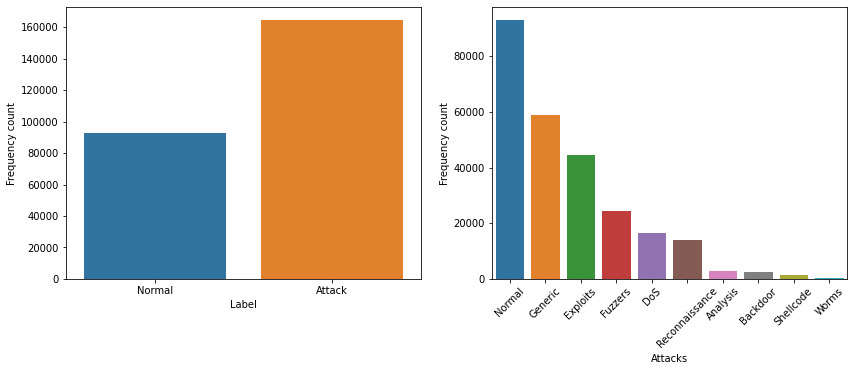

In [26]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(14, 5))
df = pd.concat([train, test], ignore_index=True)
# Create the plots
sns.countplot(x="label", data=df,ax=axes[0])
sns.countplot(x="attack_cat", data=df, order = train['attack_cat'].value_counts().index)

axes[1].tick_params('x', labelrotation=45)
axes[0].set_xticklabels(["Normal", "Attack"])
axes[0].set_xlabel("Label")
axes[1].set_xlabel("Attacks")
axes[0].set_ylabel("Frequency count")
axes[1].set_ylabel("Frequency count")



In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [28]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [29]:
cat_val=(train.dtypes == np.object)
print(train.loc[:,cat_val].head())
list_cat=train.loc[:,cat_val].columns.tolist()
print(list_cat)
#print(train.loc[:,cat_val].values)

  proto service state attack_cat
0   tcp       -   FIN     Normal
1   tcp       -   FIN     Normal
2   tcp       -   FIN     Normal
3   tcp     ftp   FIN     Normal
4   tcp       -   FIN     Normal
['proto', 'service', 'state', 'attack_cat']


In [30]:
num_val=(train.dtypes != np.object)
list_cat=train.loc[:,num_val].columns.tolist()
print(list_cat)

['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']


In [31]:
print(all((train.label==1) & (train.attack_cat!='Normal'))==False)
print(all((train.label!=1) & (train.attack_cat=='Normal'))==False)

True
True


In [32]:
mask=(train.label==1)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())

-           57656
dns         39801
http        13376
smtp         3479
ftp          2210
ftp-data     1443
pop3         1101
dhcp           94
snmp           79
ssl            56
irc            25
ssh            11
radius         10
Name: service, dtype: int64
udp        49361
tcp        40825
unas       12084
ospf        2531
sctp        1150
           ...  
netblt        98
hmp           98
bbn-rcc       98
argus         98
rdp           98
Name: proto, Length: 129, dtype: int64


In [33]:
mask = (train.label == 0)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())

-           36512
dns          7493
http         5348
ftp-data     2552
smtp         1579
ssh          1291
ftp          1218
pop3            4
radius          2
snmp            1
Name: service, dtype: int64
tcp     39121
udp     13922
arp      2859
ospf       64
igmp       18
icmp       15
rtp         1
Name: proto, dtype: int64


In [34]:
print(train.columns.values)
print(test.columns.values)
print(len(train.columns.values))

['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']
['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']
45


In [35]:
df = pd.concat([train, test], ignore_index=True)

In [36]:
df['proto'].unique() 

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [37]:
df['service'].unique() 

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [38]:
df['service']= np.where(df['service'] == '-', 'None', df['service'])
df['service'].unique() 

array(['None', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [39]:
df['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no',
       'ACC', 'CLO'], dtype=object)

In [40]:
from sklearn import preprocessing
df.drop(['id', 'attack_cat'], inplace=True,axis=1)
le = preprocessing.LabelEncoder()

df['proto'] = le.fit_transform(df['proto'])
df['service'] = le.fit_transform(df['service'])
df['state'] = le.fit_transform(df['state'])


In [41]:
df['service'].unique() 

array([ 0,  3,  9, 10,  5,  4,  2, 11,  8,  7,  1, 12,  6])

In [42]:
df['state'].unique()

array([ 4,  5,  2,  3,  7,  8,  6,  9, 10,  0,  1])

In [43]:
df['proto'].unique() 

array([113, 119,   6,  78,  37,  42,  91,  20,  53,  12, 128,  87, 126,
        72,  83,  94,  15, 110,  60, 131,  44, 120,  68,   0,  56,  40,
         9, 111,  62,  16,  90, 127, 124,  36,  22,  24,   7,  31,  82,
       100,  79,  39, 132,  92,  71,  74,  28,  81,  46,  54,  93,  55,
       104,  47,  10, 118, 112,  76, 105,   2,  95,  97,  88,  96,  27,
         5,  80,  14, 125,  35, 109,  63, 107, 102,  59, 103,  29,  85,
        17, 106,  67,  38, 101,   3,  64,  48,  70,  26,  41, 115,   1,
        52,  34,  57,  98, 114,  32,  69,  21,  51, 123,  99, 121, 122,
        18,  49,  30,  45,  50, 108,   4,   8,  23,  25,  43,  77,  86,
       129,  13,  73,  19,  33,  84, 116, 130,  65,  66,  89,  58,  61,
        75, 117,  11])

In [44]:
print(df.columns)
df.head()

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0


In [45]:
y=df["label"]
df.drop(["label"], inplace=True, axis=1)

[0.01137849 0.00710454 0.02325002 0.03365009 0.00487893 0.0052656
 0.0231559  0.00777405 0.0360432  0.19287469 0.09798354 0.01745457
 0.03444207 0.00536745 0.00589759 0.0172095  0.00746824 0.00776411
 0.0075054  0.04783134 0.01421828 0.01327605 0.02837101 0.0120777
 0.01402584 0.01327816 0.0303578  0.02029361 0.00335403 0.00171975
 0.02595833 0.07571785 0.01378829 0.01820316 0.0245267  0.03256017
 0.00034218 0.00044119 0.00373498 0.01417239 0.03588706 0.00939617]
sttl                 0.192875
dttl                 0.097984
ct_state_ttl         0.075718
swin                 0.047831
rate                 0.036043
ct_srv_dst           0.035887
dload                0.034442
state                0.033650
ct_dst_src_ltm       0.032560
smean                0.030358
dwin                 0.028371
ct_srv_src           0.025958
ct_dst_sport_ltm     0.024527
service              0.023250
sbytes               0.023156
dmean                0.020294
ct_src_dport_ltm     0.018203
sload                0

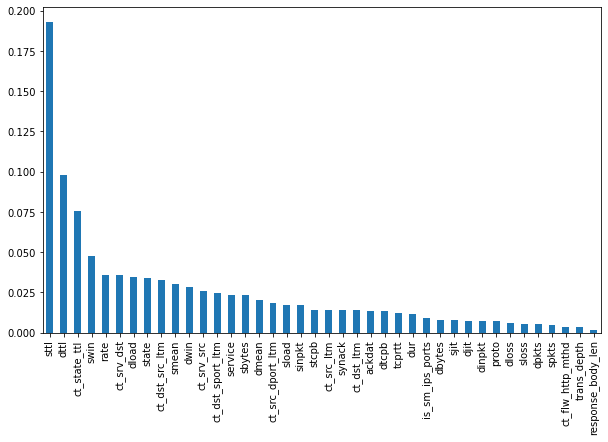

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(df,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(40).plot(kind='bar',stacked=True,figsize=(10,6))
print(feat_importances.nlargest(40))
x=feat_importances.nlargest(40)
plt.show()

In [47]:
l=[]
for i in range(38):
    l.append(x.index[i])
print(l)

['sttl', 'dttl', 'ct_state_ttl', 'swin', 'rate', 'ct_srv_dst', 'dload', 'state', 'ct_dst_src_ltm', 'smean', 'dwin', 'ct_srv_src', 'ct_dst_sport_ltm', 'service', 'sbytes', 'dmean', 'ct_src_dport_ltm', 'sload', 'sinpkt', 'stcpb', 'ct_src_ltm', 'synack', 'ct_dst_ltm', 'ackdat', 'dtcpb', 'tcprtt', 'dur', 'is_sm_ips_ports', 'dbytes', 'sjit', 'djit', 'dinpkt', 'proto', 'dloss', 'sloss', 'dpkts', 'spkts', 'ct_flw_http_mthd']


In [48]:

for i in df.columns:
    if i not in l:
        df.drop(i, inplace=True, axis=1)

In [49]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,113,0,4,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,1,0,1,1,1,1,0,1,1,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,43,1,1,1,1,2,0,1,6,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,7,1,2,1,1,3,0,2,6,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,1,1,2,1,1,3,0,2,1,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,43,1,2,2,1,40,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,119,0,5,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,1,2,2,1,1,2,0,2,1,0
257669,1.106101,113,0,4,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,1,1,2,1,1,1,0,3,2,0
257670,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,1,2,1,1,1,1,0,1,1,1
257671,0.000000,6,0,5,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,1,2,1,1,1,1,0,1,1,1


In [50]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
df, y = smt.fit_resample(df, y)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [51]:
import collections
collections.Counter(y)

Counter({0: 155499, 1: 155499})

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= 0.28)

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [73]:
print(X_train.shape)
print(X_test.shape)

(223918, 38)
(87080, 38)


In [74]:
from sklearn.ensemble import RandomForestClassifier
clf=(RandomForestClassifier(n_estimators= 140,criterion='entropy',max_features=20))

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
acc= metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9666283876894809


In [75]:
import joblib
joblib.dump(clf, "randomforest.joblib")

['randomforest.joblib']

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test, y_pred))
print('Log loss: ',log_loss(y_test, y_pred))
print('ROC AUC: ',roc_auc_score(y_test, y_pred))

Accuracy:  0.9666283876894809
Precision:  0.9735596994155302
Recall:  0.9596269032051575
F1 score:  0.966543093324737
Log loss:  1.1526251233886187
ROC AUC:  0.9666610218642429


In [77]:
rf_accuracy="%.3f" % round(accuracy_score(y_test, y_pred),3)
rf_prec="%.3f" % round(precision_score(y_test, y_pred),3)
rf_rec="%.3f" % round(recall_score(y_test, y_pred),3)
rf_f1="%.3f" % round(f1_score(y_test, y_pred),3)
rf_lgloss="%.3f" %round(log_loss(y_test, y_pred),3)
rf_rocauc="%.3f" % round(roc_auc_score(y_test, y_pred),3)


Text(0.5, 1.0, 'Confusion matrix of model')

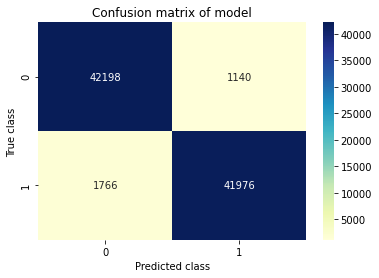

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43338
           1       0.97      0.96      0.97     43742

    accuracy                           0.97     87080
   macro avg       0.97      0.97      0.97     87080
weighted avg       0.97      0.97      0.97     87080



In [80]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score,precision_recall_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred)


In [81]:
log = LogisticRegression(solver = "liblinear")
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

In [82]:
log_acc = "%.3f" %round(accuracy_score(y_test, y_pred_log),3)
log_prec="%.3f" %round(precision_score(y_test, y_pred_log),3)
log_rec="%.3f" %round(recall_score(y_test, y_pred_log),3)
log_f1="%.3f" %round(f1_score(y_test, y_pred_log),3)
log_lgloss="%.3f" %round(log_loss(y_test, y_pred_log),3)
log_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_log),3)

Text(0.5, 1.0, 'Confusion matrix of model')

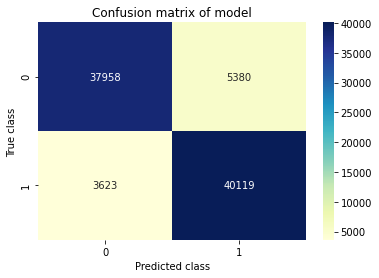

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred_log)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [84]:
print('Accuracy: ',accuracy_score(y_test, y_pred_log))
print('Precision: ',precision_score(y_test, y_pred_log))
print('Recall: ',recall_score(y_test, y_pred_log))
print('F1 score: ',f1_score(y_test, y_pred_log))
print('Log loss: ',log_loss(y_test, y_pred_log))
print('ROC AUC: ',roc_auc_score(y_test, y_pred_log))

Accuracy:  0.896612310519063
Precision:  0.8817556429811644
Recall:  0.9171734259978968
F1 score:  0.8991158772313174
Log loss:  3.5709336899122115
ROC AUC:  0.8965164744092581


In [85]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     43338
           1       0.88      0.92      0.90     43742

    accuracy                           0.90     87080
   macro avg       0.90      0.90      0.90     87080
weighted avg       0.90      0.90      0.90     87080



In [86]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)
precision_log, recall_log, th_log = precision_recall_curve(y_test, y_pred_log)

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.layers import LSTM
model=Sequential()

model.add(Dense( units = 120, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 200, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 100, activation='relu', kernel_initializer='uniform'))

model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))

In [69]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [138]:
model.fit(X_train, y_train, batch_size = 32,epochs=100)

Epoch 1/100
6998/6998 [==============================] - 16s 2ms/step - loss: 0.0424 - accuracy: 0.9395
Epoch 2/100
6998/6998 [==============================] - 16s 2ms/step - loss: 0.0416 - accuracy: 0.9410
Epoch 3/100
6998/6998 [==============================] - 15s 2ms/step - loss: 0.0408 - accuracy: 0.9420
Epoch 4/100
6998/6998 [==============================] - 15s 2ms/step - loss: 0.0402 - accuracy: 0.9432
Epoch 5/100
6998/6998 [==============================] - 15s 2ms/step - loss: 0.0397 - accuracy: 0.9440
Epoch 6/100
6998/6998 [==============================] - 16s 2ms/step - loss: 0.0392 - accuracy: 0.9448
Epoch 7/100
6998/6998 [==============================] - 15s 2ms/step - loss: 0.0390 - accuracy: 0.9450
Epoch 8/100
6998/6998 [==============================] - 15s 2ms/step - loss: 0.0388 - accuracy: 0.9451
Epoch 9/100
6998/6998 [==============================] - 15s 2ms/step - loss: 0.0385 - accuracy: 0.9461
Epoch 10/100
6998/6998 [==============================] - 16s 2m

In [139]:
acc=model.evaluate(X_test,y_test)
print('Accuracy',acc[1])
y_pred_ann=model.predict(X_test)

2722/2722 [==============================] - 5s 2ms/step - loss: 0.0329 - accuracy: 0.9543
Accuracy 0.9543178677558899


In [140]:
y_classes = model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [141]:
ann_acc ="%.3f" % round(accuracy_score(y_test, y_classes),3)
ann_prec = "%.3f" % round(precision_score(y_test, y_classes))
ann_rec = "%.3f" % round(recall_score(y_test, y_classes),3)
ann_f1 = "%.3f" % round(f1_score(y_test, y_classes),3)
ann_lgloss = "%.3f" % round(log_loss(y_test, y_classes),3)
ann_rocauc = "%.3f" % round(roc_auc_score(y_test, y_classes),3)

Text(0.5, 1.0, 'Confusion matrix of model')

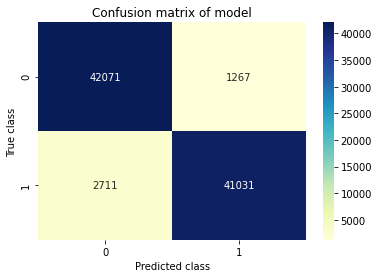

In [142]:
cf_matrix = confusion_matrix(y_test, y_classes)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [143]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     43338
           1       0.97      0.94      0.95     43742

    accuracy                           0.95     87080
   macro avg       0.95      0.95      0.95     87080
weighted avg       0.95      0.95      0.95     87080



In [144]:
model.save("ann.h5")

In [145]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
precision_ann, recall_ann, th_ann = precision_recall_curve(y_test, y_pred_ann)

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.05,
             n_estimators=1000,
             max_depth=10,
             min_child_weight=1,
             gamma=0,
             subsample=0.8,
             colsample_bytree=0.8,
             objective= 'binary:logistic',
             nthread=4,
             scale_pos_weight=1,
             seed=27)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [88]:
joblib.dump(xgb, "Xgboost.joblib")

['Xgboost.joblib']

In [147]:
xgb_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_xgb),3)
xgb_prec="%.3f" %round(precision_score(y_test, y_pred_xgb),3)
xgb_rec="%.3f" %round(recall_score(y_test, y_pred_xgb),3)
xgb_f1="%.3f" %round(f1_score(y_test, y_pred_xgb),3)
xgb_lgloss="%.3f" %round(log_loss(y_test, y_pred_xgb),3)
xgb_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_xgb),3)

In [149]:
xgb_accuracy

'0.969'

Text(0.5, 1.0, 'Confusion matrix of model')

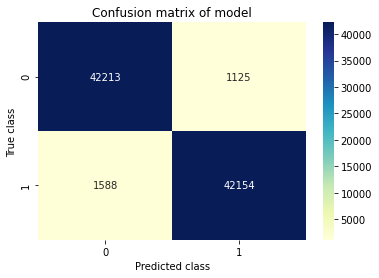

In [110]:
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [111]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43338
           1       0.97      0.96      0.97     43742

    accuracy                           0.97     87080
   macro avg       0.97      0.97      0.97     87080
weighted avg       0.97      0.97      0.97     87080



In [112]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test, y_pred_xgb)

In [113]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)

In [114]:
rc_accuracy=accuracy_score(y_test, y_pred_rc)

In [115]:
rc_accuracy

0.8736793752870923

In [116]:
rc_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_rc),3)
rc_prec="%.3f" %round(precision_score(y_test, y_pred_rc),3)
rc_rec="%.3f" %round(recall_score(y_test, y_pred_rc),3)
rc_f1="%.3f" %round(f1_score(y_test, y_pred_rc),3)
rc_lgloss="%.3f" %round(log_loss(y_test, y_pred_rc),3)
rc_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_rc),3)

Text(0.5, 1.0, 'Confusion matrix of model')

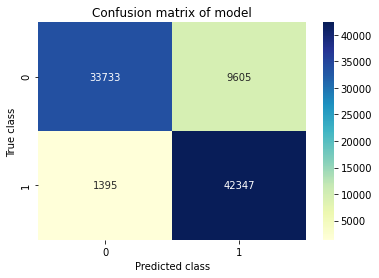

In [117]:
cf_matrix = confusion_matrix(y_test, y_pred_rc)
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [118]:
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     43338
           1       0.82      0.97      0.89     43742

    accuracy                           0.87     87080
   macro avg       0.89      0.87      0.87     87080
weighted avg       0.89      0.87      0.87     87080



In [119]:
fpr_rc, tpr_rc, thresholds_rc = roc_curve(y_test, y_pred_rc)
roc_auc_rc = auc(fpr_rc, tpr_rc)
precision_rc, recall_rc, th_rc = precision_recall_curve(y_test, y_pred_rc)

In [120]:
sgd = SGDClassifier()
sgd_fit = sgd.fit(X_train, y_train)
y_pred_sgd = sgd_fit.predict(X_test)

In [121]:
sgd_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_sgd),3)
sgd_prec="%.3f" %round(precision_score(y_test, y_pred_sgd),3)
sgd_rec="%.3f" %round(recall_score(y_test, y_pred_sgd),3)
sgd_f1="%.3f" %round(f1_score(y_test, y_pred_sgd),3)
sgd_lgloss="%.3f" %round(log_loss(y_test, y_pred_sgd),3)
sgd_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_sgd),3)

Text(0.5, 1.0, 'Confusion matrix of model')

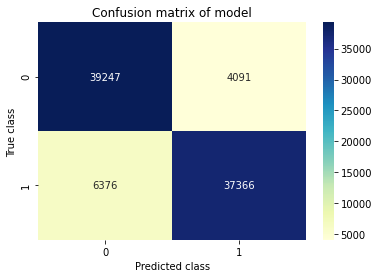

In [122]:
cf_matrix = confusion_matrix(y_test, y_pred_sgd)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [123]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     43338
           1       0.90      0.85      0.88     43742

    accuracy                           0.88     87080
   macro avg       0.88      0.88      0.88     87080
weighted avg       0.88      0.88      0.88     87080



In [124]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_sgd)
roc_auc_sgd= auc(fpr_sgd, tpr_sgd)
precision_sgd, recall_sgd, th_sgd = precision_recall_curve(y_test, y_pred_sgd)

In [125]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd',alpha = 1e-4, hidden_layer_sizes = (50,100,50), 
                          activation='logistic', 
                          random_state=1,
                          tol=1e-4,
                          learning_rate_init=.3, 
                          verbose=True)
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.34139745
Iteration 2, loss = 0.21218225
Iteration 3, loss = 0.19830479
Iteration 4, loss = 0.18592236
Iteration 5, loss = 0.17750430
Iteration 6, loss = 0.17213666
Iteration 7, loss = 0.16889803
Iteration 8, loss = 0.16579454
Iteration 9, loss = 0.16435962
Iteration 10, loss = 0.16232577
Iteration 11, loss = 0.16049858
Iteration 12, loss = 0.15980155
Iteration 13, loss = 0.15863223
Iteration 14, loss = 0.15755403
Iteration 15, loss = 0.15672196
Iteration 16, loss = 0.15598907
Iteration 17, loss = 0.15549340
Iteration 18, loss = 0.15437161
Iteration 19, loss = 0.15391820
Iteration 20, loss = 0.15316716
Iteration 21, loss = 0.15256347
Iteration 22, loss = 0.15216729
Iteration 23, loss = 0.15103027
Iteration 24, loss = 0.15146248
Iteration 25, loss = 0.15003194
Iteration 26, loss = 0.15043893
Iteration 27, loss = 0.14927939
Iteration 28, loss = 0.14905977
Iteration 29, loss = 0.14872514
Iteration 30, loss = 0.14823153
Iteration 31, loss = 0.14761962
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='constant',
              learning_rate_init=0.3, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [126]:
from sklearn.metrics import accuracy_score
pred_train = mlp.predict(X_train)
print(accuracy_score(pred_train,y_train))
y_pred_mlp =mlp.predict(X_test)
print(accuracy_score(y_pred_mlp,y_test))

0.9401745281754929
0.9392627468994028


In [127]:
joblib.dump(mlp, "mlp.joblib")

['mlp.joblib']

In [128]:
mlp_acc ="%.3f" % round(accuracy_score(y_test, y_pred_mlp),3)
print('Accuracy: ',accuracy_score(y_test, y_pred_mlp))
mlp_prec ="%.3f" %round(precision_score(y_test, y_pred_mlp),3)
print('Precision: ',precision_score(y_test, y_pred_mlp))
mlp_rec ="%.3f" %round(recall_score(y_test, y_pred_mlp),3)
print('Recall: ',recall_score(y_test, y_pred_mlp))
mlp_f1 ="%.3f" %round(f1_score(y_test, y_pred_mlp),3)
print('F1 score: ',f1_score(y_test, y_pred_mlp))
mlp_lgloss ="%.3f" %round(log_loss(y_test, y_pred_mlp),3)
print('Log loss: ',log_loss(y_test, y_pred_mlp))
mlp_rocauc ="%.3f" %round(roc_auc_score(y_test, y_pred_mlp),3)
print('ROC AUC: ',roc_auc_score(y_test, y_pred_mlp))

Accuracy:  0.9392627468994028
Precision:  0.9459766648883116
Recall:  0.9323304832883728
F1 score:  0.9391040033159477
Log loss:  2.09781178933277
ROC AUC:  0.9392950584331475


Text(0.5, 1.0, 'Confusion matrix of model')

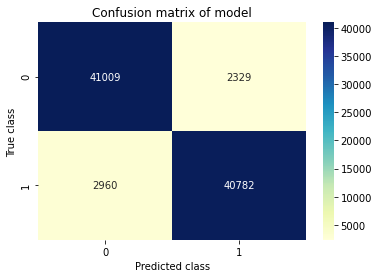

In [129]:
cf_matrix = confusion_matrix(y_test, y_pred_mlp)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [130]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     43338
           1       0.95      0.93      0.94     43742

    accuracy                           0.94     87080
   macro avg       0.94      0.94      0.94     87080
weighted avg       0.94      0.94      0.94     87080



In [131]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp= auc(fpr_mlp, tpr_mlp)
precision_mlp, recall_mlp, th_mlp = precision_recall_curve(y_test, y_pred_mlp)

In [132]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=26,criterion='entropy')

dt = dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
dt_acc=accuracy_score(y_test, y_pred_dt)
print(dt_acc)

0.9568442811208084


In [133]:
dt_accuracy="%.3f" %round(accuracy_score(y_test, y_pred_dt),3)
dt_prec="%.3f" %round(precision_score(y_test, y_pred_dt),3)
dt_rec="%.3f" %round(recall_score(y_test, y_pred_dt),3)
dt_f1="%.3f" %round(f1_score(y_test, y_pred_dt),3)
dt_lgloss="%.3f" %round(log_loss(y_test, y_pred_dt),3)
dt_rocauc="%.3f" %round(roc_auc_score(y_test, y_pred_dt),3)

In [134]:
joblib.dump(dt, "dt.joblib")

['dt.joblib']

Text(0.5, 1.0, 'Confusion matrix of model')

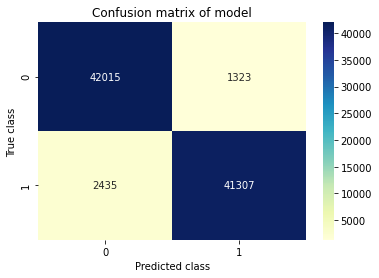

In [135]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
import seaborn as sns
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue',cmap="YlGnBu")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [136]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     43338
           1       0.97      0.94      0.96     43742

    accuracy                           0.96     87080
   macro avg       0.96      0.96      0.96     87080
weighted avg       0.96      0.96      0.96     87080



In [137]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt= auc(fpr_dt, tpr_dt)
precision_dt, recall_dt, th_dt = precision_recall_curve(y_test, y_pred_dt)

In [150]:
from IPython.display import display
dict={'Model' :["LogisticRegression","Artificialneuralnetwork","MultilayerPerceptron","DecisionTree","RandomForest","XGBoost"],
     'Accuracy' :[log_acc,ann_acc,mlp_acc,dt_accuracy,rf_accuracy,xgb_accuracy],
     'Precision':[log_prec,ann_prec,mlp_prec,dt_prec,rf_prec,xgb_prec],
     'Recall' :[log_rec,ann_rec,mlp_rec,dt_rec,rf_rec,xgb_rec],
     'F1 score' :[log_f1,ann_f1,mlp_f1,dt_f1,rf_f1,xgb_f1],
     'Log loss' :[log_lgloss,ann_lgloss,mlp_lgloss,dt_lgloss,rf_lgloss,xgb_lgloss], 
     'ROCAUC' :[log_rocauc,ann_rocauc,mlp_rocauc,dt_rocauc,rf_rocauc,xgb_rocauc]}

df = pd.DataFrame({ key:pd.Series(value) for key, value in dict.items() })

display(df)


,Model,Accuracy,Precision,Recall,F1 score,Log loss,ROCAUC
0,LogisticRegression,0.897,0.882,0.917,0.899,3.571,0.897
1,Artificialneuralnetwork,0.954,1.000,0.938,0.954,1.578,0.954
2,MultilayerPerceptron,0.939,0.946,0.932,0.939,2.098,0.939
3,DecisionTree,0.957,0.969,0.944,0.956,1.491,0.957
4,RandomForest,0.967,0.974,0.960,0.967,1.153,0.967
5,XGBoost,0.969,0.974,0.964,0.969,1.076,0.969


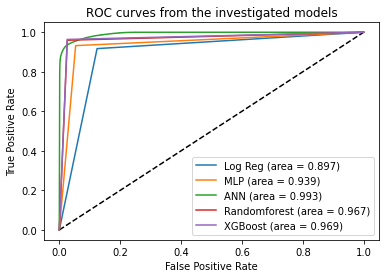

In [151]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Log Reg (area = %0.3f)' % roc_auc_log)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.3f)' % roc_auc_mlp)
plt.plot(fpr_ann, tpr_ann, label='ANN (area = %0.3f)' % roc_auc_ann)
plt.plot(fpr_rf, tpr_rf, label='Randomforest (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.3f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

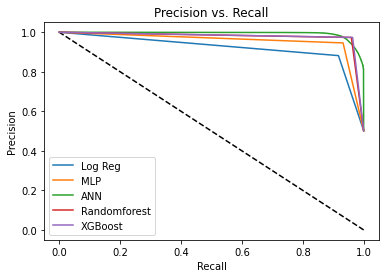

In [152]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_log, precision_log, label='Log Reg')
plt.plot(recall_mlp, precision_mlp, label='MLP')
plt.plot(recall_ann, precision_ann, label='ANN')
plt.plot(recall_rf, precision_rf, label='Randomforest')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()